In [2]:
#import libraries

import pandas as pd
import numpy as np

import os, types
from botocore.client import Config
import ibm_boto3


import matplotlib.pyplot as plt

### Code to load csv I have in my project

In [3]:

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5429512291324ab3a1faf5e88802fad3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Xa30H_gqeTtu1JZaIO8umX8MKirkIXrM7Z2jlBLPJSgI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_5429512291324ab3a1faf5e88802fad3.get_object(Bucket='analisededarkframes-donotdelete-pr-gkghzdp5zt51do',Key='DarkFrameData.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df1 = pd.read_csv(body, header=[2])

In [4]:
#see data
df1.head(10)

,time,iso,mean,median,sigma,avgDev,min,max,bg noise
0,20,400,2049.0,2049,38.8,9.6,1884,15305,12.057 (1.840e-04)
1,40,400,2049.4,2049,47.9,11.3,1915,15306,14.012 (2.138e-04)
2,60,400,2050.0,2048,54.6,15.6,1909,15307,18.925 (2.888e-04)
3,75,400,2050.4,2048,55.6,17.0,1903,15307,20.431 (3.118e-04)
4,90,400,2052.9,2049,59.2,21.3,1832,15312,25.686 (3.919e-04)
5,120,400,2054.1,2049,64.3,26.6,1867,15313,31.992 (4.882e-04)
6,20,800,2050.3,2049,54.6,16.8,1730,15306,21.197 (3.234e-04)
7,40,800,2050.7,2048,58.9,21.3,1772,15308,26.406 (4.029e-04)
8,60,800,2053.8,2049,67.4,30.5,1793,15311,37.205 (5.677e-04)
9,75,800,2055.4,2050,71.1,33.8,1775,15313,41.032 (6.261e-04)


In [22]:
#df1.describe() #some statistics

,time,iso,mean,median,sigma,avgDev,min,max
count,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,67.50000,1500.000000,2068.945833,2057.375000,112.870833,64.816667,1515.583333,15321.166667
std,33.32971,1095.445115,25.348853,12.520635,79.520539,58.937547,375.524088,18.001610
min,20.00000,400.000000,2049.000000,2048.000000,38.800000,9.600000,800.000000,15305.000000
25%,40.00000,700.000000,2051.900000,2049.000000,59.125000,21.300000,1335.000000,15308.000000
50%,67.50000,1200.000000,2057.200000,2050.500000,80.800000,43.250000,1612.000000,15313.000000
75%,90.00000,2000.000000,2073.250000,2060.500000,132.925000,86.650000,1802.750000,15325.500000
max,120.00000,3200.000000,2144.700000,2091.000000,361.100000,238.700000,1915.000000,15376.000000


### import second file

In [5]:
body = client_5429512291324ab3a1faf5e88802fad3.get_object(Bucket='analisededarkframes-donotdelete-pr-gkghzdp5zt51do',Key='DarkFrameDataDay2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2 = pd.read_csv(body, header=[7])

In [6]:
df2 = df2.drop(df2.columns[[0,1]], axis=1)

### organize the data, transform to arrays...

## 2D plot of the data

In [73]:
df1.head(10)

,time,iso,mean,median,sigma,avgDev,min,max,bg noise
0,20,400,2049.0,2049,38.8,9.6,1884,15305,12.057 (1.840e-04)
1,40,400,2049.4,2049,47.9,11.3,1915,15306,14.012 (2.138e-04)
2,60,400,2050.0,2048,54.6,15.6,1909,15307,18.925 (2.888e-04)
3,75,400,2050.4,2048,55.6,17.0,1903,15307,20.431 (3.118e-04)
4,90,400,2052.9,2049,59.2,21.3,1832,15312,25.686 (3.919e-04)
5,120,400,2054.1,2049,64.3,26.6,1867,15313,31.992 (4.882e-04)
6,20,800,2050.3,2049,54.6,16.8,1730,15306,21.197 (3.234e-04)
7,40,800,2050.7,2048,58.9,21.3,1772,15308,26.406 (4.029e-04)
8,60,800,2053.8,2049,67.4,30.5,1793,15311,37.205 (5.677e-04)
9,75,800,2055.4,2050,71.1,33.8,1775,15313,41.032 (6.261e-04)


In [150]:
df2.head(20)

,iso,time,mean,median,Sigma,AvgDev,Min,Max
0,800,20,2049.9,2049,49.6,14.6,1790,15306
1,800,40,2050.7,2049,57.5,19.4,1756,15306
2,800,60,2053.3,2050,62.8,25.6,1790,15310
3,800,90,2056.3,2050,74.5,36.6,1750,15313
4,800,120,2063.3,2053,93.1,51.5,1647,15322
5,1600,20,2053.6,2050,72.7,37.7,1521,15312
6,1600,40,2061.6,2053,94.6,56.2,1555,15316
7,1600,60,2073.7,2060,123.1,77.1,1427,15327
8,1600,90,2093.8,2069,175.2,112.9,1441,15339
9,1600,120,2122.2,2085,241.0,156.8,1391,15358


In [8]:
df2.columns

Index(['iso', 'time', 'mean', 'median', ' Sigma', ' AvgDev', ' Min', ' Max'], dtype='object')

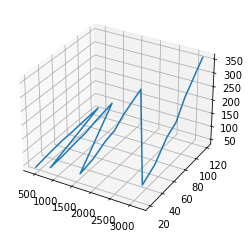

In [9]:
#configurando o plot
from mpl_toolkits import mplot3d


fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D( df1['iso'], df1['time'], df1['sigma']
           #, c=PointZ      # color value of individual points is taken from their heights
          # , cmap="hsv"    # the color mapping to be used. Other example options: winter, autumn, ..)
         )

plt.show()
    

In [32]:
#indexes  = df1['iso'] == 400
#indexes
#df1['iso'] == 400

#df1[df1['iso'] == 400]

dftemp = df1[df1['iso'] == iso]
dftemp["sigma"]*(3200/iso)
#plt.plot(dftemp["time"], dftemp["sigma"] , label='D1 ISO:'+str(iso))

18     99.1
19    129.2
20    188.1
21    210.5
22    274.1
23    361.1
Name: sigma, dtype: float64

### Standart deviantion (sigma ) vs time 

#### noise distribution
following a gaussian distribution
$$ Noise  = \frac{1}{\sigma \sqrt{2 \pi}} \exp{ [  - \frac{1}{2} \left( \frac{x-x_{mean}}{\sigma} \right)^2 ]} $$ 
Noise: # of pixel of the color x (red/gray intensity )  
\sigma: standard deviation  
x_mean: mean value of the color red/gray (for color / monochrome) 

In [131]:
def noise(x, sigma , xmean):
    return (1/(sigma*np.sqrt(2*3.14)))*np.exp(-0.5* ((x-xmean)/(sigma))*((x-xmean)/(sigma))  )

#select only the ISO400 data
dfiso400 = df1[df1['iso'] == 800]
dfiso400.head(10)

,time,iso,mean,median,sigma,avgDev,min,max,bg noise
6,20,800,2050.3,2049,54.6,16.8,1730,15306,21.197 (3.234e-04)
7,40,800,2050.7,2048,58.9,21.3,1772,15308,26.406 (4.029e-04)
8,60,800,2053.8,2049,67.4,30.5,1793,15311,37.205 (5.677e-04)
9,75,800,2055.4,2050,71.1,33.8,1775,15313,41.032 (6.261e-04)
10,90,800,2059.2,2050,82.9,44.0,1768,15318,53.276 (8.129e-04)
11,120,800,2066.6,2054,98.9,56.0,1723,15323,67.878 (1.036e-03)


In [136]:
def noise(x, sigma , xmean):
    return (1/(sigma*np.sqrt(2*3.14)))*np.exp(-0.5* ((x-xmean)/(sigma))*((x-xmean)/(sigma))  )

#select only the ISO400 data
dfiso400 = df1[df1['iso'] == 800]
dfiso400.head(10)

,time,iso,mean,median,sigma,avgDev,min,max,bg noise
6,20,800,2050.3,2049,54.6,16.8,1730,15306,21.197 (3.234e-04)
7,40,800,2050.7,2048,58.9,21.3,1772,15308,26.406 (4.029e-04)
8,60,800,2053.8,2049,67.4,30.5,1793,15311,37.205 (5.677e-04)
9,75,800,2055.4,2050,71.1,33.8,1775,15313,41.032 (6.261e-04)
10,90,800,2059.2,2050,82.9,44.0,1768,15318,53.276 (8.129e-04)
11,120,800,2066.6,2054,98.9,56.0,1723,15323,67.878 (1.036e-03)


In [137]:
print(dfiso400[dfiso400["time"] == time]['sigma'])

#xrange = np.linspace(1900,2200,100)
#yvalues = noise(xrange, 400,2049,10 )

11    98.9
Name: sigma, dtype: float64


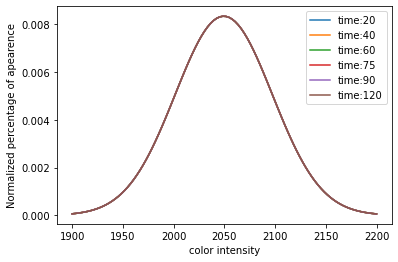

In [118]:
#plt.plot(xrange, yvalues , label='time:')

for time in dfiso400["time"].unique():
    dfiso400time = dfiso400[dfiso400["time"] == time]
    #print(time)
    #print(dfiso400time['sigma'])
    yvalues = noise(xrange, float(dfiso400['sigma'][1]), float(dfiso400['mean'][1]) )
    
    plt.plot(xrange, yvalues , label='time:'+str(time))
    plt.xlabel("color intensity")
    plt.ylabel("Normalized percentage of apearence")
    plt.legend()
    
plt.show()    

#### unormalized

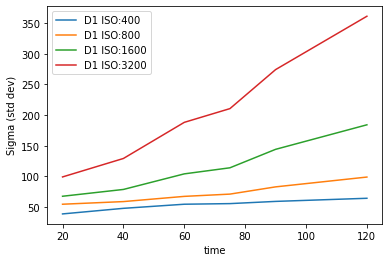

In [11]:
for iso in df1["iso"].unique() :    #need only the unique values, not every row
    #print(iso)
    dftemp = df1[df1['iso'] == iso]
    plt.plot(dftemp["time"], dftemp["sigma"] , label='D1 ISO:'+str(iso))
    
    #dftemp2 = df2[df2['iso'] == iso]
    #plt.plot(dftemp2["time"], dftemp2[" Sigma"] , ':', label='D2 ISO:'+str(iso))
    

plt.xlabel("time")
plt.ylabel("Sigma (std dev)")    
plt.legend()    
plt.show()

# plotting a scatter plot
#print("Scatter Plot:  ")
#plt.scatter(df["X"], df["Y"])
#plt.show()

#### normalized standart deviation

[Text(0.5, 0, 'time'), Text(0, 0.5, 'Sigma (std dev)*(3200/iso)')]

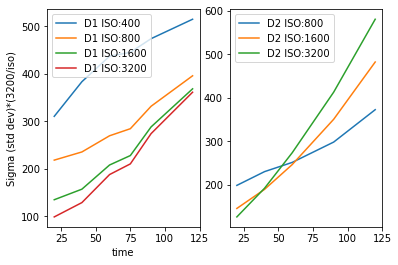

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2)

#data1
for iso in df1["iso"].unique() :    #need only the unique values, not every row
    #print(iso)
    dftemp = df1[df1['iso'] == iso]
    ax1.plot(dftemp["time"], dftemp["sigma"]*(3200/iso) , label='D1 ISO:'+str(iso))

#data2
for iso in df2["iso"].unique() :    #need only the unique values, not every row
   # print(iso)
    dftemp2 = df2[df2['iso'] == iso]
    ax2.plot(dftemp2["time"], dftemp2[" Sigma"]*(3200/iso) , label='D2 ISO:'+str(iso))
    
    
    


#fig.xlabel("time")
ax1.legend()
ax2.legend()

ax1.set(xlabel='time', ylabel='Sigma (std dev)*(3200/iso)')

#plt.xlabel("time")
#plt.ylabel("Sigma (std dev)*(3200/iso)")    
#plt.legend()    
#plt.show()

## Relative Signal to noise ratio
$$ SNR = \frac{\sigma_{ref}}{\sigma_{iso.norm}*\sqrt{t_{ref}/t}}  =  \frac{\sigma_{ref}}{\sigma*(1600/iso)*\sqrt{t_{ref}/t} } $$

###### RSN = K/(N*(1600/ISO)*sqrt(C/T)) 
sigma max de referencia (Sigma do ISO e do tempo de referencia), C eh referencia de escala de tempo (do ISO de referencia).


[Text(0.5, 0, 'time'), Text(0, 0.5, 'Relative SNR')]

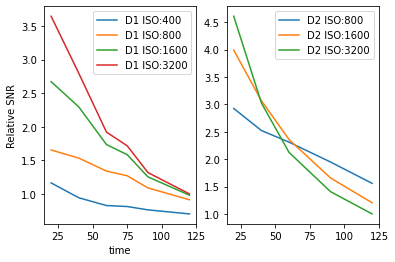

In [151]:
fig, (ax1, ax2) = plt.subplots(1, 2)


#sigma referencia, sera o valor de sigma para o ISO  e tempo escolhidos como referencia. Neste caso
#escolheremos o ISO 3200, tempo 120s -> 
dtsigmaref = df1.loc[(df1['iso'] == 3200) & (df1['time'] == 120)]
tref = 120

#print(dtsigmaref[['sigma']])
sigmaref = dtsigmaref['sigma']
#print(float(sigmaref))   #361.1



for iso in df1["iso"].unique() :    #need only the unique values, not every row
    #print(iso)
    dftemp = df1[df1['iso'] == iso]
    ax1.plot(dftemp["time"], 361.1/((dftemp["sigma"]*(3200/iso))*np.sqrt(tref/120) ) , label='D1 ISO:'+str(iso))
    
    #dftemp2 = df2[df2['iso'] == iso]
   # plt.plot(dftemp2["time"], dftemp2[" Sigma"] , ':', label='D2 ISO:'+str(iso))

for iso in df2["iso"].unique() :    #need only the unique values, not every row
   # print(iso)
    dftemp2 = df2[df2['iso'] == iso]
    ax2.plot(dftemp2["time"], 580.3/((dftemp2[" Sigma"]*(3200/iso))*np.sqrt(tref/120)) , label='D2 ISO:'+str(iso))
    
    #dftemp2 = df2[df2['iso'] == iso]
   # plt.plot(dftemp2["time"], dftemp2[" Sigma"] , ':', label='D2 ISO:'+str(iso))
    


#fig.xlabel("time")
ax1.legend()
ax2.legend()

ax1.set(xlabel='time', ylabel='Relative SNR')

### Peak noise
```df2.columns```

[Text(0.5, 0, 'time'), Text(0, 0.5, 'Peak')]

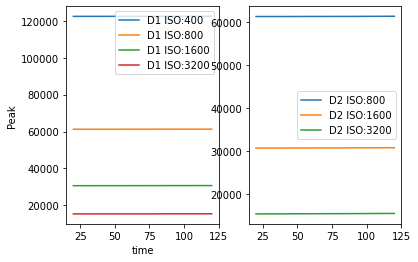

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2)



#data1
for iso in df1["iso"].unique() :    #need only the unique values, not every row
    #print(iso)
    dftemp = df1[df1['iso'] == iso]
    ax1.plot(dftemp["time"], dftemp["max"]*(3200/iso) , label='D1 ISO:'+str(iso))

#data2
for iso in df2["iso"].unique() :    #need only the unique values, not every row
   # print(iso)
    dftemp2 = df2[df2['iso'] == iso]
    ax2.plot(dftemp2["time"], dftemp2[" Max"]*(3200/iso) , label='D2 ISO:'+str(iso))
    
    
    


#fig.xlabel("time")
ax1.legend()
ax2.legend()

ax1.set(xlabel='time', ylabel='Peak')

#plt.xlabel("time")
#plt.ylabel("Sigma (std dev)*(3200/iso)")    
#plt.legend()    
#plt.show()

In [154]:
df2.head(20)

,iso,time,mean,median,Sigma,AvgDev,Min,Max
0,800,20,2049.9,2049,49.6,14.6,1790,15306
1,800,40,2050.7,2049,57.5,19.4,1756,15306
2,800,60,2053.3,2050,62.8,25.6,1790,15310
3,800,90,2056.3,2050,74.5,36.6,1750,15313
4,800,120,2063.3,2053,93.1,51.5,1647,15322
5,1600,20,2053.6,2050,72.7,37.7,1521,15312
6,1600,40,2061.6,2053,94.6,56.2,1555,15316
7,1600,60,2073.7,2060,123.1,77.1,1427,15327
8,1600,90,2093.8,2069,175.2,112.9,1441,15339
9,1600,120,2122.2,2085,241.0,156.8,1391,15358


[Text(0.5, 0, 'time'), Text(0, 0.5, 'Relative SNR')]

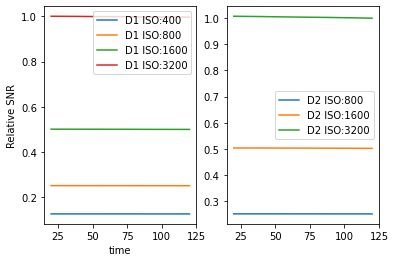

In [155]:
fig, (ax1, ax2) = plt.subplots(1, 2)


#sigma referencia, sera o valor de sigma para o ISO  e tempo escolhidos como referencia. Neste caso
#escolheremos o ISO 3200, tempo 120s -> 
dtsigmaref = df1.loc[(df1['iso'] == 3200) & (df1['time'] == 120)]
tref = 120

#print(dtsigmaref[['sigma']])
sigmaref = dtsigmaref['sigma']
#print(float(sigmaref))   #361.1



for iso in df1["iso"].unique() :    #need only the unique values, not every row
    #print(iso)
    dftemp = df1[df1['iso'] == iso]
    ax1.plot(dftemp["time"], 15322/((dftemp["max"]*(3200/iso))*np.sqrt(tref/120) ) , label='D1 ISO:'+str(iso))
    
    #dftemp2 = df2[df2['iso'] == iso]
   # plt.plot(dftemp2["time"], dftemp2[" Sigma"] , ':', label='D2 ISO:'+str(iso))

for iso in df2["iso"].unique() :    #need only the unique values, not every row
   # print(iso)
    dftemp2 = df2[df2['iso'] == iso]
    ax2.plot(dftemp2["time"], 15430/((dftemp2[" Max"]*(3200/iso))*np.sqrt(tref/120)) , label='D2 ISO:'+str(iso))
    
    #dftemp2 = df2[df2['iso'] == iso]
   # plt.plot(dftemp2["time"], dftemp2[" Sigma"] , ':', label='D2 ISO:'+str(iso))
    


#fig.xlabel("time")
ax1.legend()
ax2.legend()

ax1.set(xlabel='time', ylabel='Relative SNR')